# Interval constraint propagation

Encontrar conjunto $x^2 + y^2 \le 1$ en el plano

In [1]:
using IntervalArithmetic

In [2]:
x = y = -Inf..Inf

[-∞, ∞]

In [3]:
X = x × y

[-∞, ∞] × [-∞, ∞]

In [61]:
import Pkg; Pkg.add("TreeView")

  Resolving package versions...
  Installed TikzPictures ─ v3.1.0
Updating `~/.julia/environments/v1.5/Project.toml`
  [39424ebd] + TreeView v0.3.1
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [b4f28e30] + TikzGraphs v1.1.0
  [37f6aa50] + TikzPictures v3.1.0
  [39424ebd] + TreeView v0.3.1


In [5]:
@tree x^2 + y^2

LoadError: UndefVarError: @tree not defined

In [6]:
a = x^2

[0, ∞]

In [7]:
b = y^2

[0, ∞]

In [8]:
c = a + b  # c(x, y) = x^2 + y^2   #  {(x, y): c(x, y) ≤ 1}

[0, ∞]

In [9]:
constraint = -Inf..1

[-∞, 1]

In [10]:
c′ = c ∩ constraint

[0, 1]

In [11]:
# c = a + b;   ∴ a = c - b

In [12]:
a

[0, ∞]

In [13]:
c - b

[-∞, ∞]

In [14]:
c′ - b

[-∞, 1]

In [15]:
a′ = a ∩ (c′ - b)

[0, 1]

In [16]:
# a = x^2   ∴ x = √a ∪ -√a

In [17]:
x′ = x ∩ (√a′ ∪ -√a′)

[-1, 1]

In [37]:
using IntervalConstraintProgramming

In [38]:
C = @constraint x^2 + y^2 < 1

Separator:
  - variables: x, y
  - expression: x ^ 2 + y ^ 2 ∈ [-∞, 1]

In [39]:
Base.remove_linenums!(C.contractor.forward.code)

quote
    t->begin
            (x, y) = t
            begin
                _a = x ^ 2
                _b = y ^ 2
                _c = _a + _b
            end
            return (_c, (_a, _b))
        end
end

In [40]:
Base.remove_linenums!(C.contractor.backward.code)

quote
    (t1, t2, t3)->begin
            (x, y) = t1
            (_c,) = t2
            (_a, _b) = t3
            begin
                (_c, _a, _b) = plus_rev(_c, _a, _b)
                (_b, y, _) = power_rev(_b, y, 2)
                (_a, x, _) = power_rev(_a, x, 2)
            end
            return (x, y)
        end
end

In [41]:
C

Separator:
  - variables: x, y
  - expression: x ^ 2 + y ^ 2 ∈ [-∞, 1]

In [42]:
C(IntervalBox(X))

([0.299999, 0.916516] × [0.399999, 0.700001], [0.714142, 1.20001] × [0.399999, 0.700001])

In [43]:
f

UndefVarError: UndefVarError: f not defined

In [44]:
C(X)

([0.299999, 0.916516] × [0.399999, 0.700001], [0.714142, 1.20001] × [0.399999, 0.700001])

In [45]:
using Plots

In [46]:
X = IntervalBox(-2..2, 2)

[-2, 2] × [-2, 2]

In [47]:
p = pave(C, IntervalBox(-2..2, 2), 0.01)

Paving:
- tolerance ϵ = 0.01
- inner approx. of length 764
- boundary approx. of length 768

┌ Warning: Attribute alias `alpha` detected in the user recipe defined for the signature (::Array{IntervalBox{2,Float64},1}). To ensure expected behavior it is recommended to use the default attribute `seriesalpha`.
└ @ Plots /home/mforets/.julia/packages/Plots/sbXPh/src/pipeline.jl:15
┌ Warning: Attribute alias `alpha` detected in the user recipe defined for the signature (::Array{IntervalBox{2,Float64},1}). To ensure expected behavior it is recommended to use the default attribute `seriesalpha`.
└ @ Plots /home/mforets/.julia/packages/Plots/sbXPh/src/pipeline.jl:15


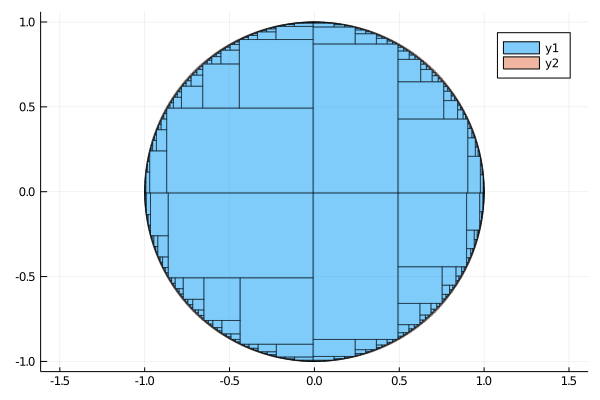

In [48]:
plot(p.inner, lw=1, ratio=1)
plot!(p.boundary, lw=1, ratio=1)

┌ Warning: Attribute alias `alpha` detected in the user recipe defined for the signature (::IntervalBox{2,Float64}). To ensure expected behavior it is recommended to use the default attribute `seriesalpha`.
└ @ Plots /home/mforets/.julia/packages/Plots/sbXPh/src/pipeline.jl:15


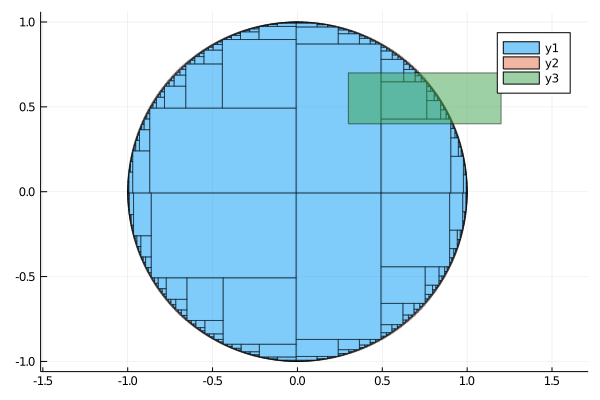

In [49]:
X = IntervalBox(0.3..1.2, 0.4..0.7)
plot!(X)

┌ Warning: Attribute alias `alpha` detected in the user recipe defined for the signature (::IntervalBox{2,Float64}). To ensure expected behavior it is recommended to use the default attribute `seriesalpha`.
└ @ Plots /home/mforets/.julia/packages/Plots/sbXPh/src/pipeline.jl:15
┌ Warning: Attribute alias `alpha` detected in the user recipe defined for the signature (::IntervalBox{2,Float64}). To ensure expected behavior it is recommended to use the default attribute `seriesalpha`.
└ @ Plots /home/mforets/.julia/packages/Plots/sbXPh/src/pipeline.jl:15


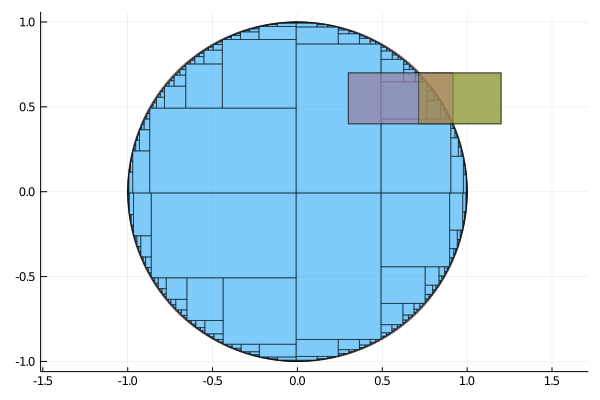

In [50]:
plot!(C(X)[1], leg=false)
plot!(C(X)[2])

In [57]:
C = @constraint -1 <= x + y <= 1

Separator:
  - variables: x, y
  - expression: x + y ∈ [-1, 1]

In [58]:
p = pave(C, IntervalBox(-3..3, 2), 0.01)

Paving:
- tolerance ϵ = 0.01
- inner approx. of length 1415
- boundary approx. of length 1413

┌ Warning: Attribute alias `alpha` detected in the user recipe defined for the signature (::Array{IntervalBox{2,Float64},1}). To ensure expected behavior it is recommended to use the default attribute `seriesalpha`.
└ @ Plots /home/mforets/.julia/packages/Plots/sbXPh/src/pipeline.jl:15


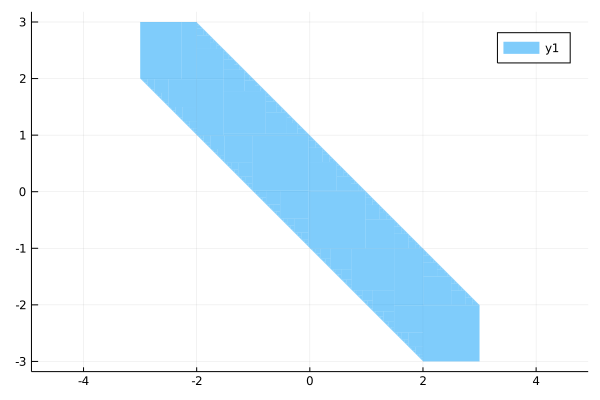

In [59]:
plot(p.inner, ratio=1, lw=0)

In [60]:
p.inner

1415-element Array{IntervalBox{2,Float64},1}:
 [1.98727, 1.99557] × [-1.004, -0.995569]
 [1.9708, 1.98728] × [-1.004, -0.987271]
 [1.9708, 1.97898] × [-0.987272, -0.978973]
 [1.93812, 1.97081] × [-1.004, -0.970804]
 [1.95433, 1.96251] × [-0.970805, -0.962507]
 [1.93812, 1.95434] × [-0.970805, -0.954338]
 [1.93812, 1.94617] × [-0.954339, -0.946169]
 [1.87327, 1.93813] × [-1.004, -0.938126]
 [1.92165, 1.92983] × [-0.938127, -0.929828]
 [1.90544, 1.92166] × [-0.938127, -0.921659]
 [1.90544, 1.9135] × [-0.92166, -0.91349]
 [1.87327, 1.90545] × [-0.938127, -0.905448]
 [1.88923, 1.89728] × [-0.905449, -0.897279]
 ⋮
 [-1.88441, -1.87669] × [0.8844, 0.891986]
 [-1.89958, -1.89198] × [0.89957, 0.907038]
 [-1.92209, -1.90703] × [0.922089, 0.936908]
 [-1.91463, -1.90703] × [0.914622, 0.92209]
 [-1.92956, -1.92208] × [0.929556, 0.936908]
 [-1.96678, -1.9369] × [0.966778, 0.996186]
 [-1.95196, -1.9369] × [0.951959, 0.966779]
 [-1.9445, -1.9369] × [0.944492, 0.95196]
 [-1.95943, -1.95195] × [0.95942